<a href="https://colab.research.google.com/github/JoshuaIwu-tech/credit-risk-prediction-shap/blob/main/credit_risk_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We first need to installs all the necessary libraries:

shap and lime for explainability

sklearn for machine learning

pandas, matplotlib, seaborn for data handling and plotting

In [ ]:
!pip install shap lime scikit-learn pandas matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=59f37de0fe55480ecc8aeb41c24a43d559b96ff927a3327eaecf396e18615a72
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Firstimport pandas as pd: loaded the pandas library and gave it the nickname pd.

Next we need to downloaded the UCI credit dataset this is a real-world dataset) using the Excel file URL.

df = pd.read_excel: Is needed to read the Excel file from the URL. header=1 means: “The column names are in the second row of the file.”
df.head: This shows the first five rows of the data so we can see what it looks like.

Why should you do it like this?:
You needed real credit card customer data to train a machine learning model. This dataset contains customer attributes like:

How much credit they have LIMIT_BAL

Whether they’ve paid on time in past months PAY_0, PAY_2, etc.

How much they owe BILL_AMT1, etc.

Whether they defaulted (default payment next month the target label)

In [ ]:
import pandas as pd

# Load data directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

# Preview the data
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Machine learning models need two things:

X: the inputs/features (e.g., age, bill amounts, payment history)

y: the label/target (what you’re trying to predict: default = 1 or 0)

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Rename the target column
df.rename(columns={'default payment next month': 'default'}, inplace=True)


Next we need to
Count the number of 1s and 0s in the default column

Normalize those counts to show proportions instead of raw numbers

df['default']
This pulls out the default column from the DataFrame.

this column contains:

1 = the customer defaulted

0 = the customer did not default

.value_counts()
This counts how many times each value (0 and 1) appears.

.value_counts(normalize=True)
This gives the percentage (proportion) of each class instead of just the raw count.

In [ ]:
df['default'].value_counts(normalize=True)

NameError: name 'df' is not defined

Next we need to should the information that our model will be learning from
First make X — this contains all the input features (customer behavior, bills, age, etc.).

Next make y — this is the output label, which is either 1 (default) or 0 (no default).

Why Did we do ti like this:
This is a standard machine learning setup:

X is what the model sees (the data)

y is what the model is supposed to learn to predict

This split is required so we can train a model to map inputs (X) to outputs (y).

In [ ]:
X = df.drop('default', axis=1)
y = df['default']


next we need to normalize the data. from sklearn.preprocessing import StandardScaler This imports a tool from scikit-learn that lets you normalize your data.

When we apply standardization using StandardScaler, we transform every feature so that:

The mean becomes 0: the data is centered around zero.

The standard deviation becomes 1: the data spreads evenly.

Centering the data around 0 helps treat all features equally and allows weights to converge more fairly during training.

Standardizing to unit variance ensures each feature contributes equally to model training.

 1. scaler.fit(X)
Calculates the mean (
𝜇
μ) and standard deviation (
𝜎
σ) for each column in your dataset X.

It stores those values inside the scaler object.

It does not change the data yet — it just "learns" how to scale it.

2. scaler.transform(X)
Uses those stored values to transform each number in X using this formula:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Next we need to imports the train_test_split function from scikit-learn.

train_test_split(...)
This function takes your dataset and randomly splits it into:

A training set (used to teach the model)

A test set (used to check how well the model performs on new data)

X_scaled and y
X_scaled: your input features, already normalized

y: your target labels (0 = no default, 1 = default)

🔹 test_size=0.2
This means: 20% of the data will be used for testing, and 80% for training.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Next we imported the Logistic Regression class from scikit-learn.

This is the machine learning algorithm we'll use to classify whether a customer will default or not.

We next created a new model object called model using the LogisticRegression class.

why max_iter=1000? This tells the model: take up to 1000 rounds/iterations to learn the best weights.”

lastly trained the model using the training data:

X_train: the input features

y_train: the known labels (default vs no default)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Next we need to see how well the m odel did

We imported three very important tools for evaluating classification models:

confusion_matrix: Shows how many predictions were correct vs. incorrect

classification_report: Gives precision, recall, F1-score

roc_auc_score: Measures the probability-based separation ability of the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probability of class 1

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[4549  138]
 [1004  309]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

ROC AUC Score: 0.7269748884917869


To ensure the credit risk predictions made by our logistic regression model are transparent and explainable, we use SHAP (SHapley Additive exPlanations). SHAP assigns each feature a contribution score for a given prediction, making it possible to understand how much each feature pushed the model's decision toward a default or non-default outcome.

Using shap.LinearExplainer, we compute SHAP values for each sample in the test set. We then use a force plot to visualize the prediction for a single individual:

Red arrows indicate features that increased the predicted risk of default.

Blue arrows indicate features that decreased the risk.

The length of each arrow represents the strength of that feature's influence.

This visualization enables us to interpret and justify individual predictions, which is especially critical in regulated domains like finance where explainability is essential for auditing, compliance, and stakeholder trust.

In [ ]:
import shap

# Create an explainer for the logistic regression model
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Plot explanation for one prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X.columns)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


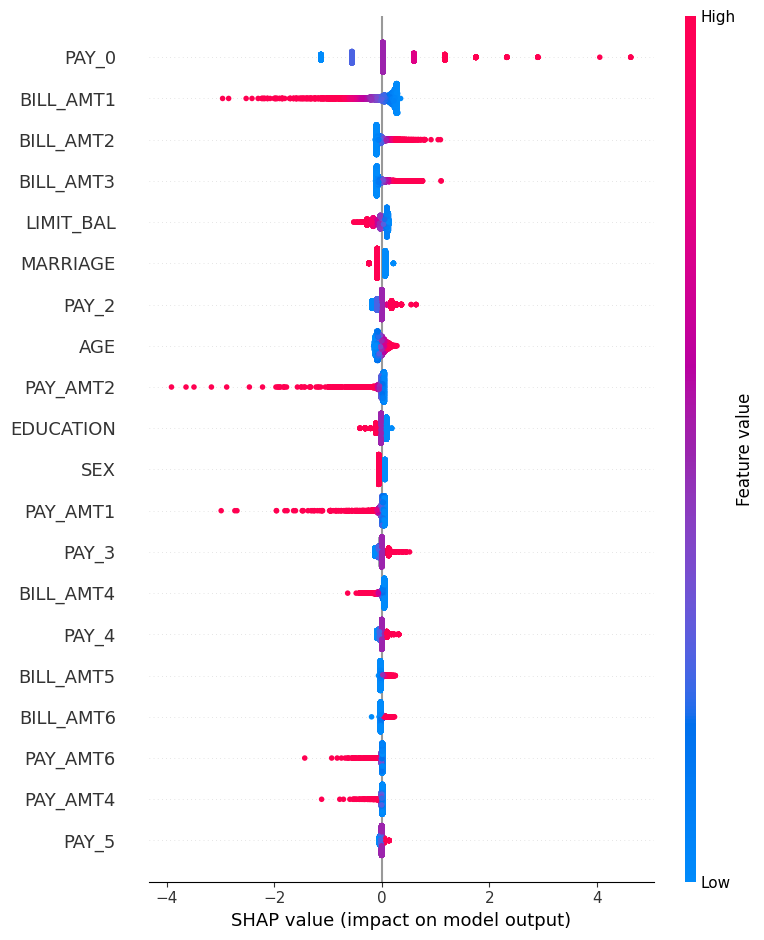

In [ ]:
import matplotlib.pyplot as plt

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


The SHAP summary plot visualizes the impact of each feature on the model’s prediction across the entire test dataset. It helps us understand:

Which features are most influential globally

How those features push predictions toward default (1) or no default (0)

The direction and magnitude of each feature’s effect

How to Read This Plot:
Each dot represents one customer (one row of test data).

Y-axis: Features, sorted by overall importance (top = most important).

X-axis: SHAP value (positive values push the prediction toward default).

Color:

🔴 Red = high feature value (e.g., high bill or missed payment)

🔵 Blue = low feature value (e.g., on-time payments, low credit usage)

Interpretation:
PAY_0 (last month's repayment status) is the most important feature.

High values (red) → strong push toward default.

Low values (blue) → push away from default.

BILL_AMT1–3 (recent billing amounts) also increase risk when high.

LIMIT_BAL (credit limit): higher values reduce risk, shown by red values clustering to the left.

AGE and MARRIAGE: lower-impact but still play a role — older age slightly reduces risk.

Why This Matters:
This global explanation shows that the model’s behavior is aligned with real-world logic:

Customers with missed payments and large bills are more likely to default.

Higher credit limits and older age reduce that risk.

This level of explainability is essential in finance for auditability, compliance, and fairness.